<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 171.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
missing_counts = df[critical_cols].isnull().sum()
print("Missing values in critical columns:\n", missing_counts)
most_freq_jobsat = df['JobSat'].mode()[0]
df['JobSat'] = df['JobSat'].fillna(most_freq_jobsat)
most_freq_remote = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_freq_remote)
print(df[critical_cols].isnull().sum())

Missing values in critical columns:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


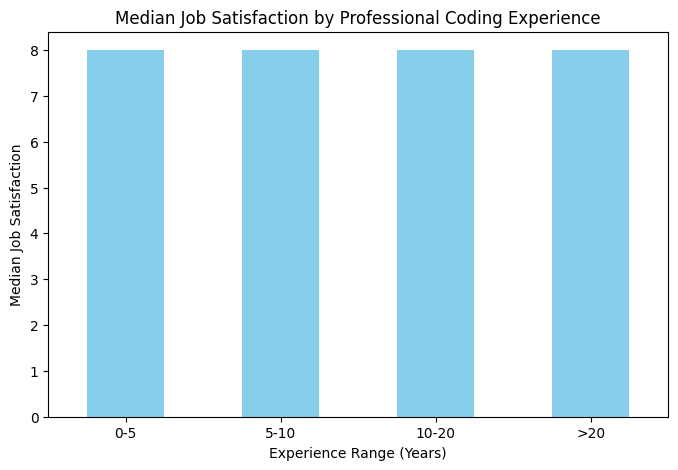

In [6]:
def convert_years_code(value):
    if pd.isnull(value):
        return None
    if isinstance(value, str):
        value = value.strip()
        if value.lower() in ['less than 1 year', '<1 year']:
            return 0.5
        elif value.lower() in ['more than 50 years', '>50 years']:
            return 50
        try:
            return float(value)
        except ValueError:
            return None
    return value

df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years_code)
bins = [0, 5, 10, 20, 100]  # 0-5, 5-10, 10-20, >20 years
labels = ['0-5', '5-10', '10-20', '>20']

df['ExperienceRange'] = pd.cut(df['YearsCodePro_Num'], bins=bins, labels=labels, right=False)
median_jobsat_by_range = df.groupby('ExperienceRange', observed=True)['JobSat'].median()
print(median_jobsat_by_range)
import matplotlib.pyplot as plt

median_jobsat_by_range.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.show()

#### Step 5: Visualize Job Satisfaction


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, color='skyblue')
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


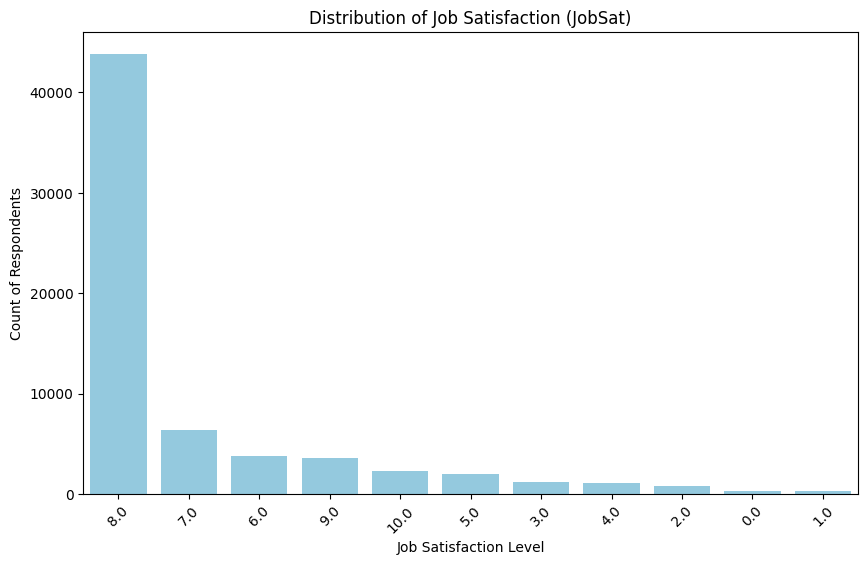

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, color='skyblue')
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


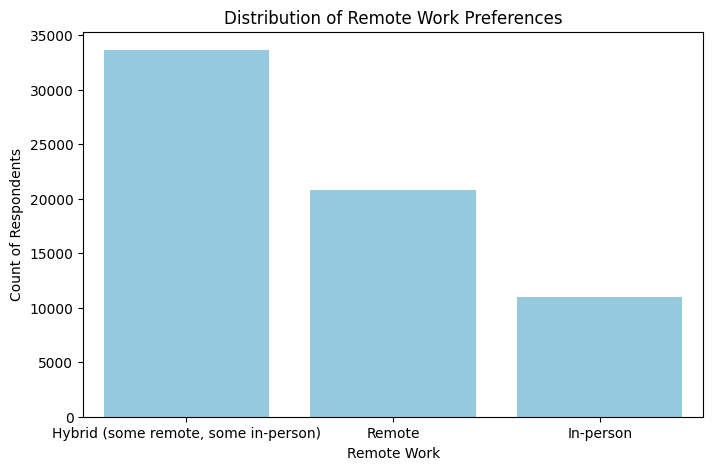

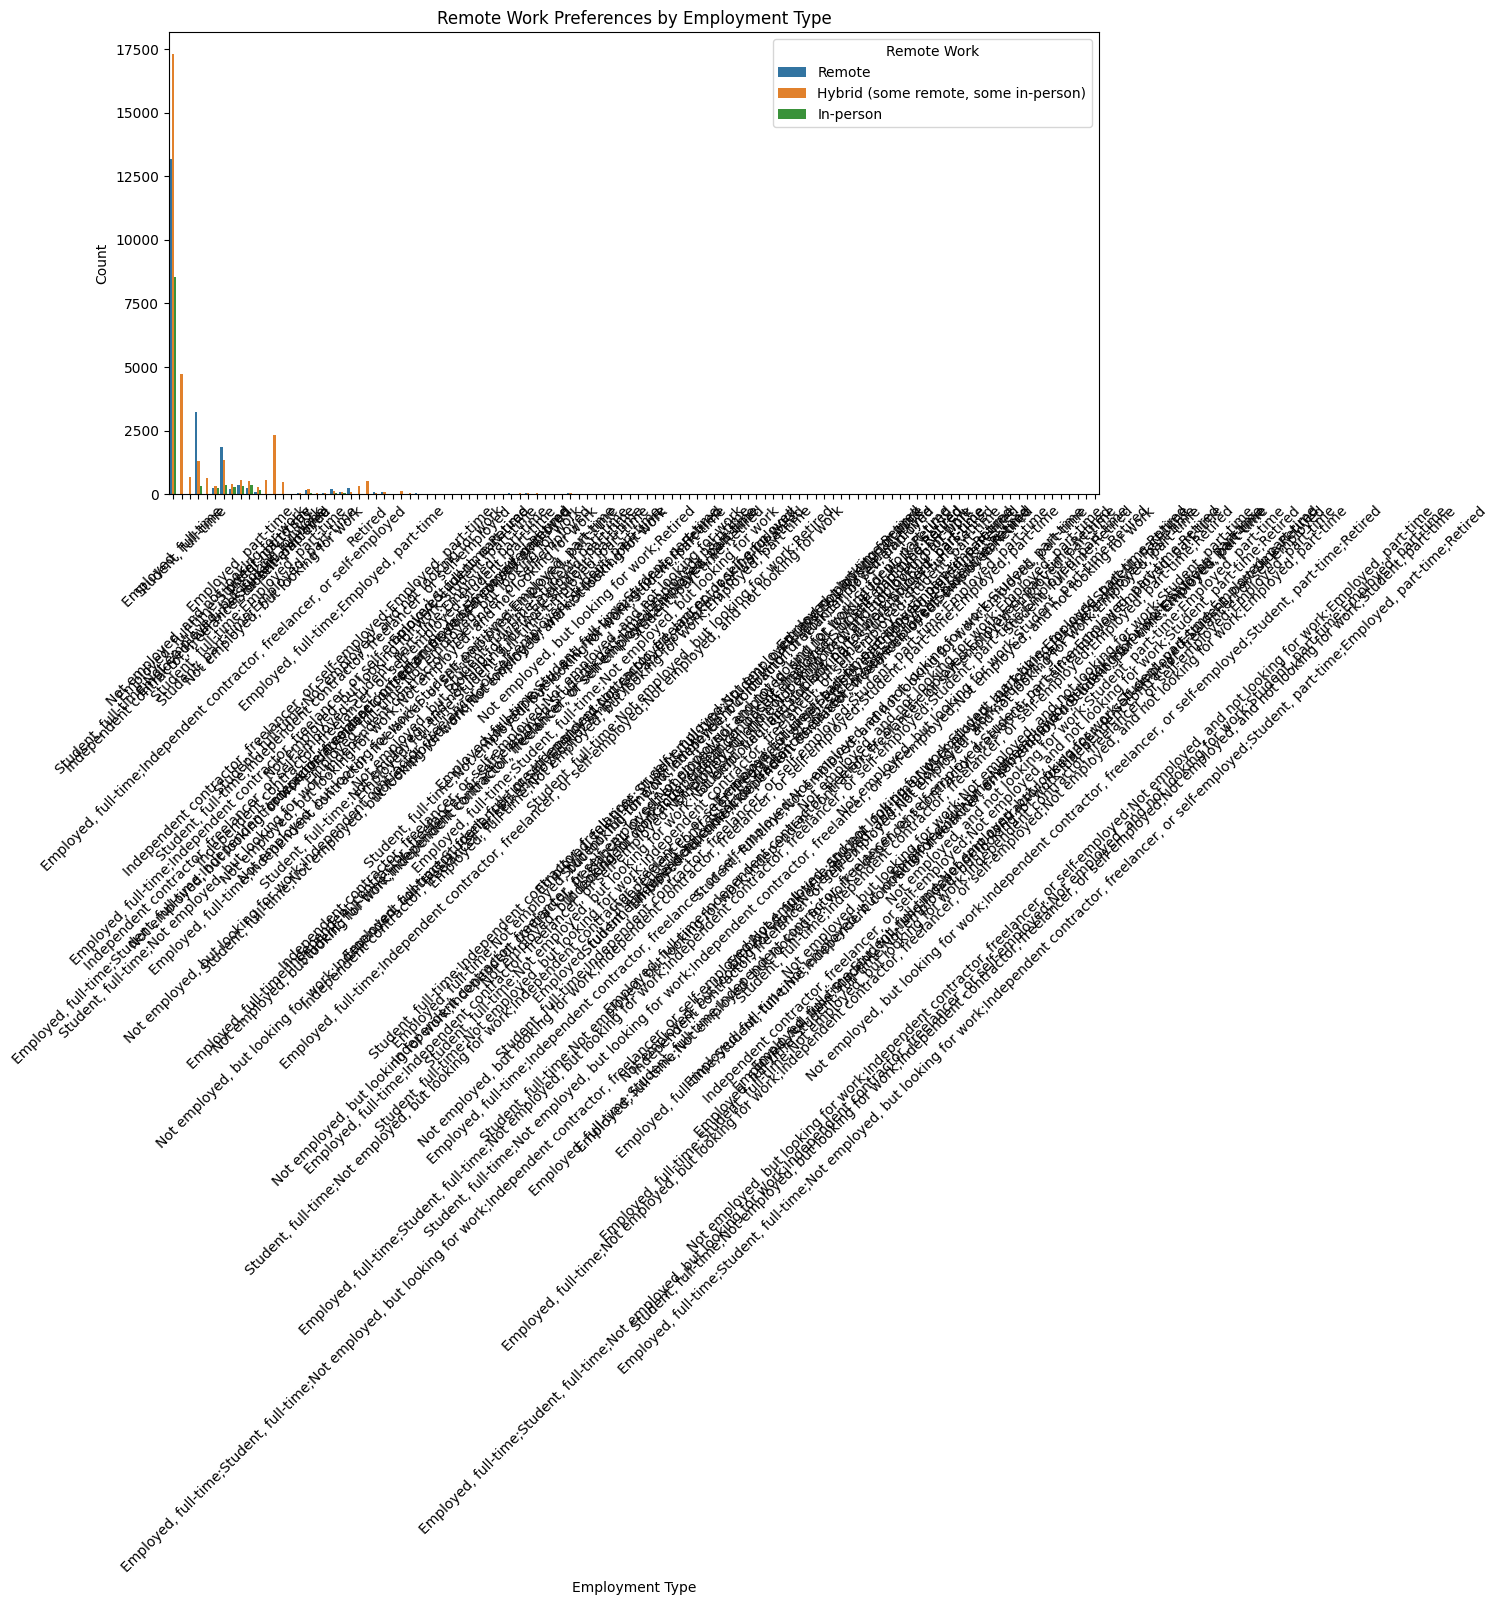

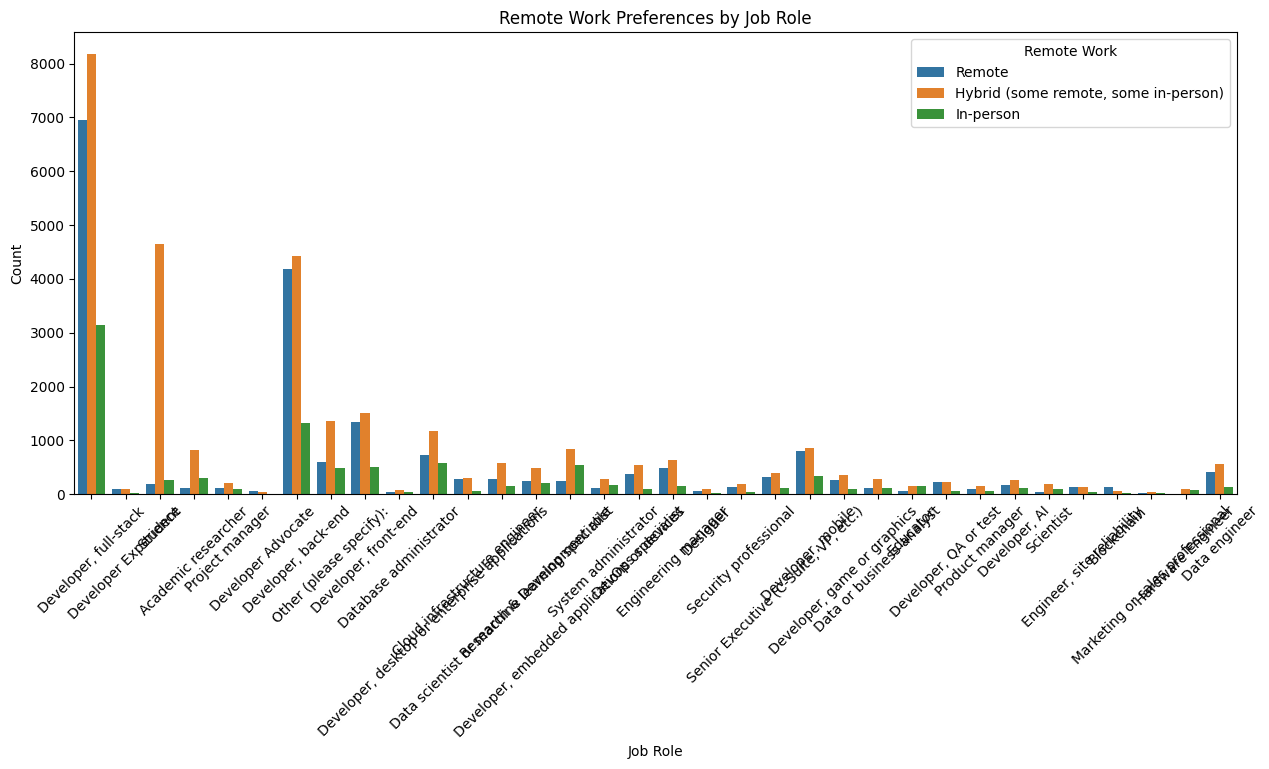

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, color='skyblue')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Employment', hue='RemoteWork')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.show()

plt.figure(figsize=(15,6))
sns.countplot(data=df, x='DevType', hue='RemoteWork')
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Language
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
TypeScript                 4173
C#                         3112
Java                       2949
C++                        2607
C                          2225
Name: count, dtype: int64


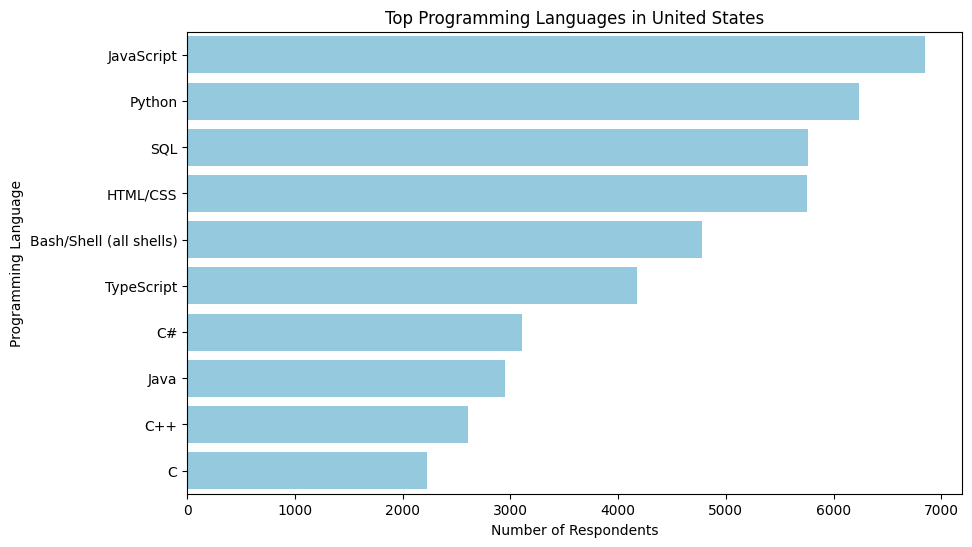

In [15]:
df_languages = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_languages = df_languages.assign(Language=df_languages['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
region_df = df_languages[df_languages['Country'] == 'United States of America']
top_languages = region_df['Language'].value_counts().head(10)
print(top_languages)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_languages.values, y=top_languages.index, color='skyblue')
plt.title('Top Programming Languages in United States')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


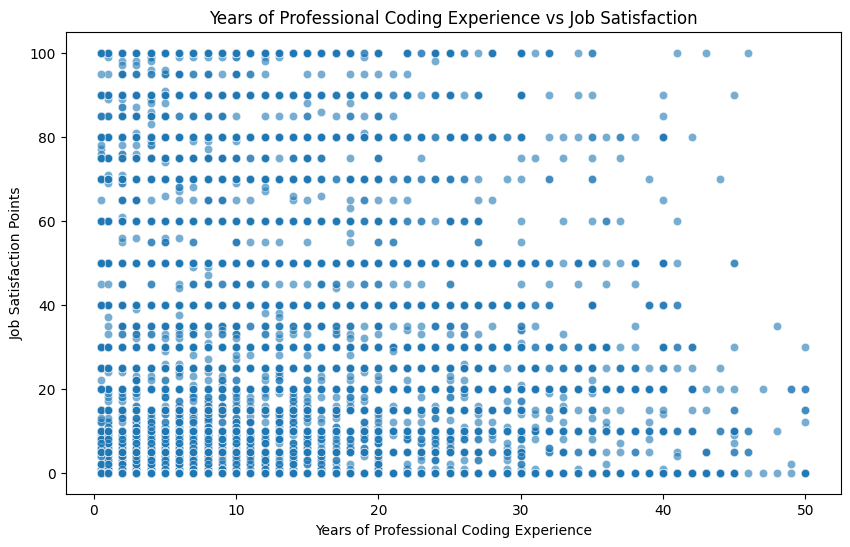

In [17]:
def convert_years_code(value):
    if pd.isnull(value):
        return None
    if isinstance(value, str):
        value = value.strip()
        if value.lower() in ['less than 1 year', '<1 year']:
            return 0.5
        elif value.lower() in ['more than 50 years', '>50 years']:
            return 50
        try:
            return float(value)
        except ValueError:
            return None
    return value

df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years_code)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YearsCodePro_Num', y='JobSatPoints_1', alpha=0.6)
plt.title('Years of Professional Coding Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment_Grouped                                  Employed  \
EdLevel                                                        
Associate degree (A.A., A.S., etc.)                     1098   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17205   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        11333   
Primary/elementary school                                186   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)          2156   
Secondary school (e.g. American high school, Ge...      1572   
Some college/university study without earning a...      3720   
Something else                                           402   

Employment_Grouped                                  Independent Contractor  \
EdLevel                                                                      
Associate degree (A.A., A.S., etc.)                                    143   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                          1592   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)

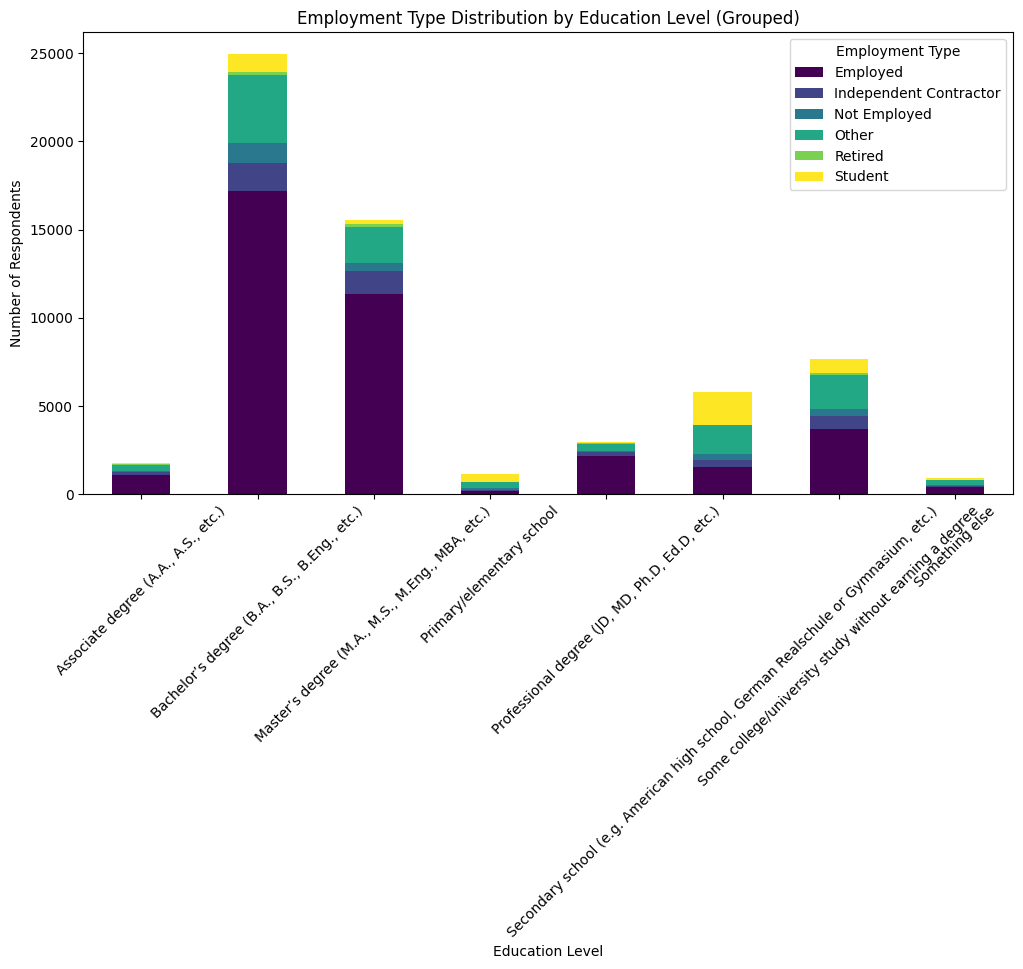

In [27]:
def group_employment(emp):
    if emp in ['Employed, full-time', 'Employed, part-time', 'Self-employed, full-time', 'Self-employed, part-time']:
        return 'Employed'
    elif emp in ['Not employed, but looking for work', 'Not employed, and not looking for work']:
        return 'Not Employed'
    elif emp in ['Independent contractor, freelancer, or self-employed']:
        return 'Independent Contractor'
    elif emp in ['Student, full-time', 'Student, part-time']:
        return 'Student'
    elif emp in ['Retired']:
        return 'Retired'
    else:
        return 'Other'

df['Employment_Grouped'] = df['Employment'].apply(group_employment)
edu_emp_ct_grouped = pd.crosstab(df['EdLevel'], df['Employment_Grouped'])
print(edu_emp_ct_grouped)
edu_emp_ct_grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Employment Type Distribution by Education Level (Grouped)')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
